In [2]:
from hapi import *
from pylab import show,plot,subplot,xlim,ylim,title,legend,xlabel,ylabel #,hold (N/A)

In [3]:
db_begin('data')

# Start the local database in folder 'data'

Using data

H2O
                     Lines parsed: 11257
CO2
                     Lines parsed: 3769
O2
                     Lines parsed: 489


In [4]:
fetch('O3',3,1,3900,4050)

# Download lines for the main isotopologue of ozone in the [3900,4050] range


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: O3
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
Header written to data/O3.header
END DOWNLOAD
                     Lines parsed: 8114
PROCESSED


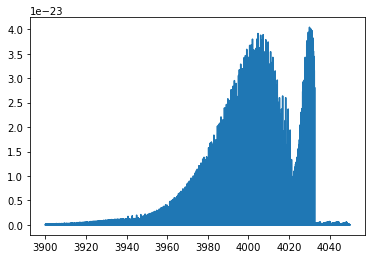

In [5]:
x,y = getStickXY('O3')
plot(x,y); show()

# Plot a stick spectrum using the function getStickXY(...)

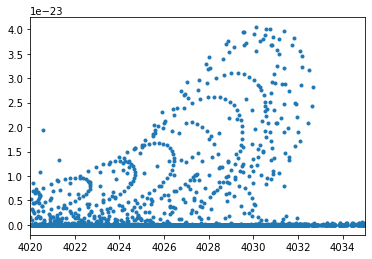

In [7]:
plot(x,y,'.'); xlim([4020,4035]); show()

# Zoom in spectral region [4020,4035] cm-1

ValueError: x and y must have same first dimension, but have shapes (600,) and (1,)

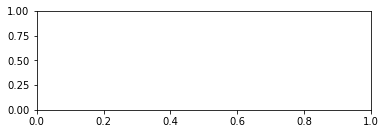

In [18]:
wn = arange(3002,3008,0.01) # get wavenumber range of interest
voi = PROFILE_VOIGT(3005,0.1,0.3,wn,0.01)[0] # calc Voigt
lor = PROFILE_LORENTZ(3005,0.3,wn,0.01) # calc Lorentz
diff = voi-lor # calc difference
subplot(2,1,1) # upper panel
plot(wn,voi,'red',wn,lor,'blue') # plot both profiles
legend(['Voigt','Lorentz']) # show legend
title('Voigt and Lorentz profiles') # show title
subplot(2,1,2) # lower panel
plot(wn,diff) # plot difference
title('Voigt-Lorentz residual') # show title
show() # show all figures

# N/A

In [16]:
help(PROFILE_VOIGT)

Help on function PROFILE_VOIGT in module hapi.hapi:

PROFILE_VOIGT(Nu, GammaD, Gamma0, Delta0, WnGrid, YRosen=0.0, Sw=1.0)
    # Voigt profile based on HTP.
    # Input parameters:
    #      Nu        : Unperturbed line position in cm-1 (Input).
    #      GammaD    : Doppler HWHM in cm-1 (Input)
    #      Gamma0    : Speed-averaged line-width in cm-1 (Input).       
    #      Delta0    : Speed-averaged line-shift in cm-1 (Input).
    #      WnGrid    : Current WaveNumber of the Computation in cm-1 (Input).
    #      YRosen    : 1st order (Rosenkranz) line mixing coefficients in cm-1 (Input)



{'self': 1.0}
1.966065 seconds elapsed for abscoef; nlines = 8114
{'self': 1.0}
3.446035 seconds elapsed for abscoef; nlines = 8114
{'self': 1.0}
2.818968 seconds elapsed for abscoef; nlines = 8114
{'self': 1.0}
2.528149 seconds elapsed for abscoef; nlines = 8114


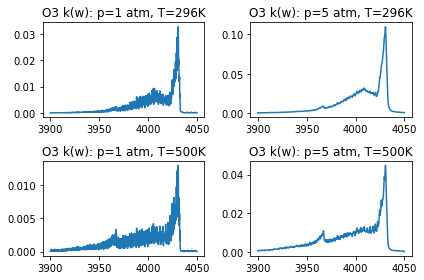

In [21]:
# Calculate and plot absorption coefficients for ozone using Voigt profile. 
# Spectra are calculated for 4 cases of thermodynamic parameters: 
# (1 atm, 296 K), (5 atm, 296 K), (1 atm, 500 K), and (5 atm, 500 K)


import matplotlib.pyplot as plt

nu1,coef1 = absorptionCoefficient_Voigt(((3,1),),'O3',
 OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
 Environment={'p':1,'T':296.})
nu2,coef2 = absorptionCoefficient_Voigt(((3,1),),'O3',
 OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
 Environment={'p':5,'T':296.})
nu3,coef3 = absorptionCoefficient_Voigt(((3,1),),'O3',
 OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
 Environment={'p':1,'T':500.})
nu4,coef4 = absorptionCoefficient_Voigt(((3,1),),'O3',
 OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
 Environment={'p':5,'T':500.})
subplot(2,2,1); plot(nu1,coef1); title('O3 k(w): p=1 atm, T=296K')
subplot(2,2,2); plot(nu2,coef2); title('O3 k(w): p=5 atm, T=296K')
subplot(2,2,3); plot(nu3,coef3); title('O3 k(w): p=1 atm, T=500K')
subplot(2,2,4); plot(nu4,coef4); title('O3 k(w): p=5 atm, T=500K')
plt.tight_layout()
plt.show()

# The tight_layout() function from matplotlib can help to prevent subplots from overlapping each other

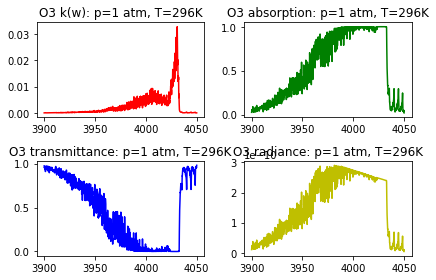

In [23]:
# Calculate and plot absorption, transmittance, and radiance spectra for 1 atm and 296K. 
# Path length is set to 10 m

import matplotlib.pyplot as plt

nu,absorp = absorptionSpectrum(nu1,coef1,Environment={'l':1000.})
nu,transm = transmittanceSpectrum(nu1,coef1,Environment={'l':1000.})
nu,radian = radianceSpectrum(nu1,coef1,Environment={'l':1000.,'T':296.})
subplot(2,2,1); plot(nu1,coef1,'r'); title('O3 k(w): p=1 atm, T=296K')
subplot(2,2,2); plot(nu,absorp,'g'); title('O3 absorption: p=1 atm, T=296K')
subplot(2,2,3); plot(nu,transm,'b'); title('O3 transmittance: p=1 atm, T=296K')
subplot(2,2,4); plot(nu,radian,'y'); title('O3 radiance: p=1 atm, T=296K')

plt.tight_layout()
plt.show()

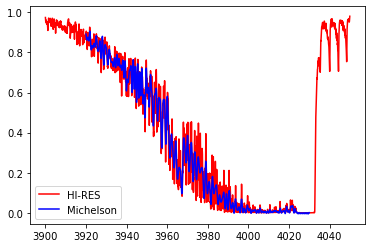

In [24]:
# Calculate and compare high-resolution spectrum for O3 with lower resolution spectrum 
# convoluted with an instrumental function of an ideal Michelson interferometer.

nu_,trans_,i1,i2,slit = convolveSpectrum(nu,transm,SlitFunction=SLIT_MICHELSON,
 Resolution=1.0,AF_wing=20.0)
plot(nu,transm,'red',nu_,trans_,'blue');
legend(['HI-RES','Michelson']);
show()